<a href="https://colab.research.google.com/github/tamaranindt26/DrugsClassification-KNN/blob/main/KNN_Drugs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
dataset = pd.read_csv('/content/drive/MyDrive/drug200.csv')
dataBersih = dataset.replace('?', np.NaN)

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

dataBersihNew = dataBersih.dropna()
dataBersihNew

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


# Mengubah data categorical jadi numerik

In [ ]:
#X denotes the dataset
X = dataBersihNew[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = dataBersihNew['Drug']


In [ ]:
#Check the unique values in the extracted columns:
print (pd.unique(X['Sex']))
print (pd.unique(X['BP']))
print (pd.unique(X['Cholesterol']))

['F' 'M']
['HIGH' 'LOW' 'NORMAL']
['HIGH' 'NORMAL']


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])
X['BP'] = le.fit_transform(X['BP'])
X['Cholesterol'] = le.fit_transform(X['Cholesterol'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [ ]:
X.shape

(200, 5)

# Splitting the dataset into the Training set and Test set

In [ ]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Menentukan nilai K optimal

Text(0, 0.5, 'Accuracy')

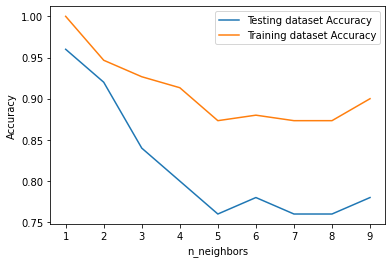

In [ ]:
import matplotlib.pyplot as plt
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute traning and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')

#Nilai akurasi paling mendekati sempurna ketika K = 0, karena K= 0 tidak memungkinkan maka digunakan K = 2

## dengan melihat error terendah

Minimum error:- 0.04 at K = 0


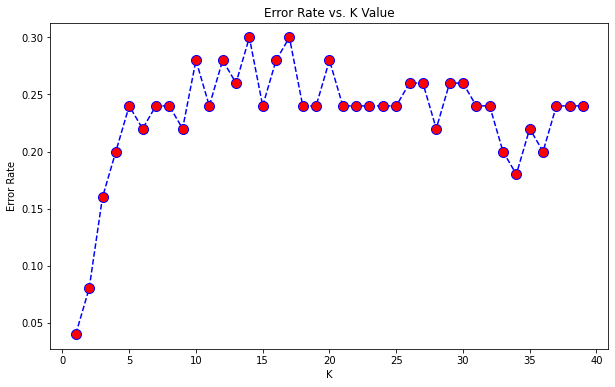

In [ ]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

## dengan melihat akurasi tertinggi

Maximum accuracy:- 0.96 at K = 0


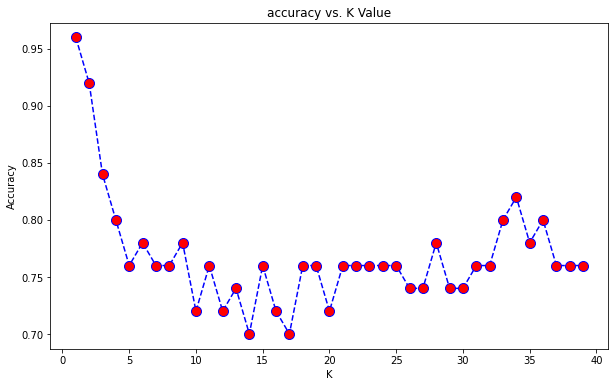

In [ ]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

# Fitting K-NN to the Training set

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2, metric = 'euclidean', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

# Melakukan Prediksi

In [ ]:
import pandas as pd

y_pred = classifier.predict(X_test)
df_pred = pd.DataFrame(y_pred)
df_pred

,0
0,drugC
1,drugX
2,DrugY
3,DrugY
4,DrugY
5,drugX
6,drugX
7,drugX
8,DrugY
9,drugX


# Membuat Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
df_cm

,0,1,2,3,4
0,24,0,1,0,0
1,1,4,0,0,0
2,1,0,0,0,0
3,0,0,0,3,0
4,1,0,0,0,15


#Memasukan Akurasi

In [ ]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       DrugY       0.89      0.96      0.92        25
       drugA       1.00      0.80      0.89         5
       drugB       0.00      0.00      0.00         1
       drugC       1.00      1.00      1.00         3
       drugX       1.00      0.94      0.97        16

    accuracy                           0.92        50
   macro avg       0.78      0.74      0.76        50
weighted avg       0.92      0.92      0.92        50



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.92